# Práctico 1: Aprendizaje Automático.
## Diplodatos Kaggle Competition
<h3><FONT COLOR="#FF0000"> Alumno: Melania Omonte, Máximo Zoppini, Flavio Olivier (Omega)</FONT></h3>

In [1]:
#biblios...
import numpy as np
import pandas as pd


In [2]:
#leemos df_train...

#df_train = pd.read_csv('data/train.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/YamanduDali/DiploDatos2019/master/04%20Aprendizaje%20Supervisado/data/train_en.csv', index_col = 'ind')
df_train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID,lang,Description_clean
ind,,,,,,,,,,,,,,,,,,,,,
0,2,3,299,0,1,1,7,0,1,1,...,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0,en,Nibble is a 3 month old ball of cuteness. He i...
1,1,4,307,0,2,1,2,0,2,1,...,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3,en,"Good guard dog, very alert, active, obedience ..."
2,1,1,307,0,1,1,0,0,2,1,...,2,1,1,0,41326,This handsome yet cute boy is up for adoption....,2,4,en,This handsome yet cute boy is up for adoption....
3,2,3,266,0,2,5,6,0,2,1,...,2,1,1,0,41326,This is a stray kitten that came to my house. ...,2,5,en,This is a stray kitten that came to my house. ...
4,2,12,264,264,1,1,0,0,2,3,...,3,1,1,300,41326,anyone within the area of ipoh or taiping who ...,1,6,en,anyone within the area of ipoh or taiping who ...


In [3]:
#describe...
df_train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,4.000000,11200.750000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,4.000000,14992.000000


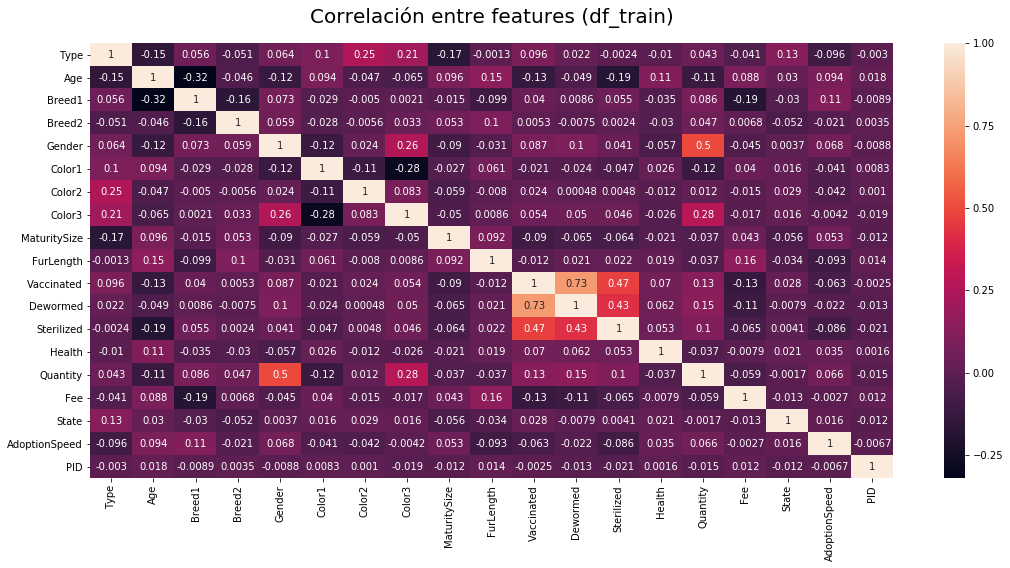

In [5]:
#matriz de correlación sobre train...
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18, 8))
plt.title('Correlación entre features (df_train)', fontdict = {'fontsize': 20}, pad = 20)

sns.heatmap(df_train.corr(), annot = True)

plt.show()

In [6]:
#leemos df_test...

#df_test = pd.read_csv('data/test.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/YamanduDali/DiploDatos2019/master/04%20Aprendizaje%20Supervisado/data/test_en.csv', index_col = 'ind')
df_test.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,PID,lang,Description_clean
ind,,,,,,,,,,,,,,,,,,,,,
0,2,1,265,0,1,1,2,0,2,2,...,3,3,1,1,0,41401,I just found it alone yesterday near my apartm...,1,en,I just found it alone yesterday near my apartm...
1,1,1,307,0,1,2,7,0,2,2,...,1,2,1,1,0,41326,Their pregnant mother was dumped by her irresp...,2,en,Their pregnant mother was dumped by her irresp...
2,1,0,307,0,2,1,2,7,2,1,...,2,2,1,6,0,41326,Siu Pak just give birth on 13/6/10 to 6puppies...,7,en,Siu Pak just give birth on 13/6/10 to 6puppies...
3,2,12,265,0,2,1,7,0,2,2,...,3,3,1,1,0,41326,"Very manja and gentle stray cat found, we woul...",9,en,"Very manja and gentle stray cat found, we woul..."
4,2,3,264,0,2,1,2,5,3,3,...,1,2,1,1,50,41326,Kali is a super playful kitten who is on the g...,11,en,Kali is a super playful kitten who is on the g...


In [7]:
#side by side...
from IPython.display import display_html

def siamesas(*args):
    html_str = ''
    spaciador = '<table style="min-width: 50px !important;"><tr style="min-width: 50px !important; background:none !important;"><td style="min-width: 50px !important;"></td></tr></table>'
    for df in args:
        html_str += df.to_html() + spaciador
        
    display_html(html_str.replace('table', 'table style = "display:inline"'), raw = True)


In [8]:
#leemos las auxiliares...

breed = pd.read_csv('data/breed_labels.csv')
color = pd.read_csv('data/color_labels.csv')
state = pd.read_csv('data/state_labels.csv')

siamesas(breed, color, state)


,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita
5,6,1,Alaskan Malamute
6,7,1,American Bulldog
7,8,1,American Eskimo Dog
8,9,1,American Hairless Terrier
9,10,1,American Staffordshire Terrier


In [9]:
#función transformadora...

def transform_columns(df):
    df = df.drop(['Description'], axis = 1)
    df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
    df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
    df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
    df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
    df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
    df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
    df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
    df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
    df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
    df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
    df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
    df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
    df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))

    #arreglos mios...
    
    #df = df.drop(['State'], axis = 1) #empeora si la dropeo...
    df.State = df.State.replace(dict(zip(state.StateID, state.StateName))) #aplico labelización...
    df = df.drop(['lang'], axis = 1) #suma poco como dummy...
    
    #df['FEE'] = df['Fee'].apply(lambda x: 'sincosto' if x == 0 else 'concosto') #generamos nueva variable FEE categorica...
    #df = df.drop(['Fee'], axis = 1)
    
    return df


In [10]:
#transformo df_train...

df_train1 = transform_columns(df_train)
df_train1

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID,Description_clean
ind,,,,,,,,,,,,,,,,,,,,
0,Cat,3,Tabby,N/A,Male,Black,White,N/A,S,S,N,F,F,Healthy,1,100,Selangor,2,0,Nibble is a 3 month old ball of cuteness. He i...
1,Dog,4,Mixed Breed,N/A,Female,Black,Brown,N/A,M,S,T,T,F,Healthy,1,150,Kuala Lumpur,2,3,"Good guard dog, very alert, active, obedience ..."
2,Dog,1,Mixed Breed,N/A,Male,Black,N/A,N/A,M,S,N,F,F,Healthy,1,0,Selangor,2,4,This handsome yet cute boy is up for adoption....
3,Cat,3,Domestic Short Hair,N/A,Female,Cream,Gray,N/A,M,S,N,F,F,Healthy,1,0,Selangor,2,5,This is a stray kitten that came to my house. ...
4,Cat,12,Domestic Long Hair,Domestic Long Hair,Male,Black,N/A,N/A,M,L,N,F,N/A,Healthy,1,300,Selangor,1,6,anyone within the area of ipoh or taiping who ...
5,Cat,2,Domestic Medium Hair,N/A,Female,Gray,N/A,N/A,M,M,N,F,F,Healthy,1,0,Selangor,1,8,"healthy and active, feisty kitten found in nei..."
6,Dog,2,Mixed Breed,N/A,Male,Black,Brown,White,M,S,N,T,F,Healthy,1,0,Kuala Lumpur,1,10,"For serious adopter, please do sms or call for..."
7,Cat,2,Domestic Medium Hair,N/A,Mixed,Black,Gray,White,S,M,N,F,N/A,Healthy,7,0,Selangor,1,13,Hi Pet Lovers This is my first posting and I n...
8,Dog,3,Mixed Breed,N/A,Female,Brown,Cream,White,M,M,N/A,N/A,N/A,Healthy,1,0,Kuala Lumpur,2,14,"Lost Dog Found Bandar Menjalara, Kepong/Taman ..."


In [11]:
#transformo df_test...

df_test1 = transform_columns(df_test)
df_test1

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,PID,Description_clean
ind,,,,,,,,,,,,,,,,,,,
0,Cat,1,Domestic Medium Hair,N/A,Male,Black,Brown,N/A,M,M,N/A,N/A,N/A,Healthy,1,0,Kuala Lumpur,1,I just found it alone yesterday near my apartm...
1,Dog,1,Mixed Breed,N/A,Male,Brown,White,N/A,M,M,T,T,F,Healthy,1,0,Selangor,2,Their pregnant mother was dumped by her irresp...
2,Dog,0,Mixed Breed,N/A,Female,Black,Brown,White,M,S,N,F,F,Healthy,6,0,Selangor,7,Siu Pak just give birth on 13/6/10 to 6puppies...
3,Cat,12,Domestic Medium Hair,N/A,Female,Black,White,N/A,M,M,N/A,N/A,N/A,Healthy,1,0,Selangor,9,"Very manja and gentle stray cat found, we woul..."
4,Cat,3,Domestic Long Hair,N/A,Female,Black,Brown,Cream,L,L,T,T,F,Healthy,1,50,Selangor,11,Kali is a super playful kitten who is on the g...
5,Dog,2,Mixed Breed,N/A,Male,Brown,Cream,Gray,M,L,T,T,F,Healthy,1,0,Selangor,12,Peanut was an abused puppy until he was rescue...
6,Cat,36,Persian,British Shorthair,Male,Golden,N/A,N/A,L,M,T,T,T,Healthy,1,0,Selangor,25,Garfield is a very large cat. Needs daily groo...
7,Cat,4,Domestic Short Hair,N/A,Female,Black,Gray,White,S,S,N,F,F,Healthy,2,0,Selangor,33,Two gorgeous kittens have just lost their mumm...
8,Cat,3,Domestic Short Hair,N/A,Female,Black,White,N/A,S,S,T,F,F,Healthy,1,1,Pulau Pinang,34,Open for adoption


In [12]:
#valores nan, zeros, N/A por features...

#df_train...
display(pd.concat([pd.DataFrame(df_train1.isna().sum(), columns = ['nan']).T,
           pd.DataFrame((df_train1 == 0).sum(axis = 0), columns = ['ceros']).T,
           pd.DataFrame((df_train1 == 'N/A').sum(axis = 0), columns = ['N/A']).T]))

print('filas: {} x columnas: {}'.format(df_train1.shape[0], df_train1.shape[1]))
print()

#juntas...
display(pd.concat([pd.DataFrame(df_test1.isna().sum(), columns = ['nan']).T,
           pd.DataFrame((df_test1 == 0).sum(axis = 0), columns = ['ceros']).T,
           pd.DataFrame((df_test1 == 'N/A').sum(axis = 0), columns = ['N/A']).T]))

print('filas: {} x columnas: {}'.format(df_test1.shape[0], df_test1.shape[1]))


,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID,Description_clean
nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
ceros,0,134,0,0,0,0,0,0,0,0,0,0,0,0,0,8949,0,285,1,0
N/A,0,0,4,7603,0,0,3146,7531,0,0,1337,1304,1259,0,0,0,0,0,0,0


filas: 10582 x columnas: 20



,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,PID,Description_clean
nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
ceros,0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,3714,0,0,0
N/A,0,0,1,3159,0,0,1325,3073,0,0,531,477,556,0,0,0,0,0,0


filas: 4411 x columnas: 19


In [13]:
df_train1['Description_clean'].fillna('', inplace = True) #reemplaza nulos.
df_train1['Description_clean'] = df_train1['Description_clean'].str.replace('[^\w\s]','') #remueve puntuación.

df_test1['Description_clean'].fillna('', inplace = True) #reemplaza nulos
df_test1['Description_clean'] = df_test1['Description_clean'].str.replace('[^\w\s]','') #remueve puntuación.

In [14]:
df_train1['Description_clean'][0]

'Nibble is a 3 month old ball of cuteness He is energetic and playful I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled The result was this little kitty I do not have enough space and funds to care for more cats in my household Looking for responsible people to take over Nibbles care'

In [15]:
df_test1['Description_clean'][0]

'I just found it alone yesterday near my apartment It was shaking so I had to bring it home to provide temporary care'

### Comienza NPL...

In [16]:
#aplicamos estrategia Tfidf...
from sklearn.feature_extraction.text import TfidfVectorizer
import re

pattern = re.compile('[\W_]+', re.UNICODE)

texts_train = [pattern.sub(' ', x) for x in df_train1['Description_clean']]
texts_test = [pattern.sub(' ', x) for x in df_test1['Description_clean']]


In [17]:
#construimos vectorizer...

Tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1, 3))

In [18]:
#enseñamos y transformamos...

texts_train_tfidf = Tfidf.fit_transform(texts_train)
texts_test_tfidf = Tfidf.transform(texts_test)

#texts_train_tfidf = Tfidf.fit_transform(df_train1['Description_clean'])
#texts_test_tfidf = Tfidf.transform(df_test1['Description_clean'])

texts_train_tfidf.shape, texts_test_tfidf.shape

((10582, 417633), (4411, 417633))

In [19]:
#reducimos dimensionalidad de los vectores para utilizarlos como nuevos features...
from sklearn.decomposition import TruncatedSVD

componentes = 100 #probé varios...
svd = TruncatedSVD(n_components = componentes, random_state = 42)

texts_train_svd = svd.fit_transform(texts_train_tfidf)
texts_test_svd = svd.transform(texts_test_tfidf)


In [20]:
#joineamos a las tablas train y test nuevos features...

df_train2 = df_train1.join(pd.DataFrame(texts_train_svd, columns = ['svd_' + str(x) for x in np.arange(componentes)]))
df_test2 = df_test1.join(pd.DataFrame(texts_test_svd, columns = ['svd_' + str(x) for x in np.arange(componentes)]))

In [21]:
df_train2.shape, df_test2.shape

((10582, 120), (4411, 119))

### ... termina NPL.

In [22]:
#uno tablas...

df = pd.concat([df_train2, df_test2], sort = True)


In [23]:
df = df.drop(['Description_clean'], axis = 1)

In [24]:
#dummys...

df = pd.get_dummies(df)

#escalamiento.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df['Fee'] = scaler.fit_transform(df['Fee'].values.reshape(-1, 1))
df['Quantity'] = scaler.fit_transform(df['Quantity'].values.reshape(-1, 1))

df.head()


C:\Users\Flavio\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Flavio\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Flavio\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Flavio\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Flavio\Anaconda3\envs\diplodatos\lib\site-packages\sklearn\util

,AdoptionSpeed,Age,Fee,PID,Quantity,svd_0,svd_1,svd_10,svd_11,svd_12,...,State_Selangor,State_Terengganu,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
ind,,,,,,,,,,,,,,,,,,,,,
0,2.0,-0.410466,1.004184,0,-0.391237,0.004934,0.019179,-0.001926,-0.003935,-0.010969,...,1,0,1,0,0,1,0,1,0,0
1,2.0,-0.355385,1.641842,3,-0.391237,0.008240,0.023061,-0.015671,0.006333,-0.002830,...,0,0,1,0,0,0,1,0,0,1
2,2.0,-0.520627,-0.271132,4,-0.391237,0.039165,0.030303,-0.024951,-0.008031,0.030589,...,1,0,1,0,0,0,1,1,0,0
3,2.0,-0.410466,-0.271132,5,-0.391237,0.004084,0.008095,0.019742,-0.019544,-0.015846,...,1,0,1,0,0,1,0,1,0,0
4,1.0,0.085261,3.554816,6,-0.391237,0.005271,0.039568,0.022091,0.027405,0.010228,...,1,0,0,1,0,1,0,1,0,0


In [25]:
#separo df_train y df_test...

df_train3 = df.loc[df['AdoptionSpeed'].notna()]
df_test3 = df.loc[df['AdoptionSpeed'].isna()]

In [26]:
df_train3

,AdoptionSpeed,Age,Fee,PID,Quantity,svd_0,svd_1,svd_10,svd_11,svd_12,...,State_Selangor,State_Terengganu,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
ind,,,,,,,,,,,,,,,,,,,,,
0,2.0,-0.410466,1.004184,0,-0.391237,0.004934,0.019179,-0.001926,-0.003935,-0.010969,...,1,0,1,0,0,1,0,1,0,0
1,2.0,-0.355385,1.641842,3,-0.391237,0.008240,0.023061,-0.015671,0.006333,-0.002830,...,0,0,1,0,0,0,1,0,0,1
2,2.0,-0.520627,-0.271132,4,-0.391237,0.039165,0.030303,-0.024951,-0.008031,0.030589,...,1,0,1,0,0,0,1,1,0,0
3,2.0,-0.410466,-0.271132,5,-0.391237,0.004084,0.008095,0.019742,-0.019544,-0.015846,...,1,0,1,0,0,1,0,1,0,0
4,1.0,0.085261,3.554816,6,-0.391237,0.005271,0.039568,0.022091,0.027405,0.010228,...,1,0,0,1,0,1,0,1,0,0
5,1.0,-0.465546,-0.271132,8,-0.391237,0.003431,0.008021,0.001588,-0.053932,-0.000340,...,1,0,1,0,0,1,0,1,0,0
6,1.0,-0.465546,-0.271132,10,-0.391237,0.003058,0.009851,-0.006266,0.010246,-0.002958,...,0,0,1,0,0,0,1,1,0,0
7,1.0,-0.465546,-0.271132,13,3.683664,0.008742,0.025668,0.010729,0.027531,0.025606,...,1,0,0,1,0,1,0,1,0,0
8,2.0,-0.410466,-0.271132,14,-0.391237,0.009111,0.028184,-0.005710,-0.007951,0.027677,...,0,0,0,1,0,0,1,0,1,0


In [27]:
df_test3

,AdoptionSpeed,Age,Fee,PID,Quantity,svd_0,svd_1,svd_10,svd_11,svd_12,...,State_Selangor,State_Terengganu,Sterilized_F,Sterilized_N/A,Sterilized_T,Type_Cat,Type_Dog,Vaccinated_N,Vaccinated_N/A,Vaccinated_T
ind,,,,,,,,,,,,,,,,,,,,,
0,NaN,-0.520627,-0.271132,1,-0.391237,0.004184,0.025109,-0.000747,0.023902,-0.015510,...,0,0,0,1,0,1,0,0,1,0
1,NaN,-0.520627,-0.271132,2,-0.391237,0.008273,0.110709,-0.049912,0.033172,-0.010083,...,1,0,1,0,0,0,1,0,0,1
2,NaN,-0.575708,-0.271132,7,3.004514,0.007645,0.066203,-0.006242,0.015835,0.018658,...,1,0,1,0,0,0,1,1,0,0
3,NaN,0.085261,-0.271132,9,-0.391237,0.010800,0.061412,0.007056,0.023461,0.107349,...,1,0,0,1,0,1,0,0,1,0
4,NaN,-0.410466,0.366526,11,-0.391237,0.010105,0.052113,-0.003740,0.005994,-0.020343,...,1,0,1,0,0,1,0,0,0,1
5,NaN,-0.465546,-0.271132,12,-0.391237,0.010290,0.059374,-0.039570,-0.030525,0.097064,...,1,0,1,0,0,0,1,0,0,1
6,NaN,1.407197,-0.271132,25,-0.391237,0.008074,0.043258,0.036002,0.038840,-0.006496,...,1,0,0,0,1,1,0,0,0,1
7,NaN,-0.355385,-0.271132,33,0.287913,0.007867,0.041700,0.001090,0.023685,-0.021786,...,1,0,1,0,0,1,0,1,0,0
8,NaN,-0.410466,-0.258379,34,-0.391237,0.287112,-0.011071,-0.009119,-0.000709,-0.004991,...,0,0,1,0,0,1,0,0,0,1


In [28]:
#preparo df_train para modelar...
#... reservo df_test para la predicción.

X = df_train3.drop('AdoptionSpeed', axis = 1)
y = df_train3['AdoptionSpeed']

XX = df_test3.drop('AdoptionSpeed', axis = 1)
yy = None

X.shape, y.shape, XX.shape

((10582, 473), (10582,), (4411, 473))

In [29]:
#dividimos X (df_train original) en entrenamiento (X_train) y validacion (X_valid)...
#... plantamos semilla.
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, random_state = 42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((9523, 473), (1059, 473), (9523,), (1059,))

### Modelamos DecisionTreeClassifier...

In [30]:
#grid-search y 10-fold cross-validation sobre el conjunto de entrenamiento.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#seteamos parámetros para el grid...
profundidad = np.arange(3, 10)
hojas = [3, 5, 7, 9]
parametros = {
    #'criterion' : ['gini', 'entropy'],
    #'min_samples_split': (3, 5, 10, 50),
    #'max_depth' : profundidad,
    #'min_samples_leaf': hojas
    'criterion' : ['gini'],
    'min_samples_split': [50],
    'max_depth' : [5],
    'min_samples_leaf': [9]
}

#construimos modelo y lo corremos...
clf_tree = DecisionTreeClassifier(random_state = 42)

gridtree = GridSearchCV(clf_tree, param_grid = parametros, cv = 10, scoring = 'accuracy', iid = False)
gridtree.fit(X_train.drop(['PID'], axis = 1), y_train)

#mejores...
print('Mejor score: {}'.format(gridtree.best_score_))
print()
print('Mejores parámetros: {}'.format(gridtree.best_params_))
print()
print('Mejor combinación: {}'.format(gridtree.best_estimator_))

Mejor score: 0.3692001434891875

Mejores parámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 50}

Mejor combinación: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


In [31]:
#predicción...
from sklearn.metrics import accuracy_score

y_train_pred_gridtree = gridtree.predict(X_train.drop(['PID'], axis = 1))
y_valid_pred_gridtree = gridtree.predict(X_valid.drop(['PID'], axis = 1))

accuracy_train_gridtree = accuracy_score(y_train, y_train_pred_gridtree)
print('Accuracy sobre entrenamiento: %.8f' %  accuracy_score(y_train, y_train_pred_gridtree))

accuracy_valid_gridtree = accuracy_score(y_valid, y_valid_pred_gridtree)
print('Accuracy sobre validación: %.8f' % accuracy_score(y_valid, y_valid_pred_gridtree))

Accuracy sobre entrenamiento: 0.38485771
Accuracy sobre validación: 0.35316336


In [32]:
#dimensionamos datas...

X.shape, XX.shape

((10582, 473), (4411, 473))

In [33]:
#entrenamos modelo con todos los datos...

gridtree.fit(X.drop(['PID'], axis = 1), y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'criterion': ['gini'], 'min_samples_split': [50], 'max_depth': [5], 'min_samples_leaf': [9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
#hacemos predicción sobre test...

yy = gridtree.predict(XX.drop(["PID"], axis = 1))
yy = yy.astype(np.int)
yy

array([1, 2, 2, ..., 1, 4, 4])

In [35]:
#submission...

submissiontree = pd.DataFrame(list(zip(XX.PID, yy)), columns = ['PID', 'AdoptionSpeed'])
submissiontree.to_csv('data/submission_tree.csv', header = True, index = False)

### Modelamos SGDClassifier...

In [ ]:
# grid-search y 10-fold cross-validation sobre el conjunto de entrenamiento.
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

#construimos modelo...
clf_sgd = SGDClassifier(tol = 1e-3, random_state = 42)

#seteamos parámetros para el grid...
parametros = {
    'loss' : ['hinge', 'log', 'squared_hinge', 'modified_huber', 'perceptron'],
    'alpha' : [0.0001, 0.001, 0.01],
    'max_iter': [1800, 2000, 2200],
    'penalty' : ['l1', 'l2', 'elasticnet']
}

gridsgd = GridSearchCV(clf_sgd, param_grid = parametros, cv = 10, scoring = 'accuracy')
gridsgd.fit(X_train.drop(['PID'], axis = 1), y_train)

#mejores...
print('Mejor score: {}'.format(gridsgd.best_score_))
print()
print('Mejores parámetros: {}'.format(gridsgd.best_params_))
print()
print('Mejor combinación: {}'.format(gridsgd.best_estimator_))


In [ ]:
#predicciones...
from sklearn.metrics import accuracy_score

y_train_pred_gridsgd = gridsgd.predict(X_train.drop(['PID'], axis = 1))
y_valid_pred_gridsgd = gridsgd.predict(X_valid.drop(['PID'], axis = 1))

accuracy_train_gridsgd = accuracy_score(y_train, y_train_pred_gridsgd)
print('Accuracy sobre entrenamiento: %.8f' %  accuracy_score(y_train, y_train_pred_gridsgd))

accuracy_valid_gridsgd = accuracy_score(y_valid, y_valid_pred_gridsgd)
print('Accuracy sobre validación: %.8f' % accuracy_score(y_valid, y_valid_pred_gridsgd))

In [ ]:
#dimensionamos datas...

X.shape, XX.shape

In [ ]:
#entrenamos modelo con todos los datos...

gridsgd.fit(X.drop(['PID'], axis = 1), y)

In [ ]:
#hacemos predicción sobre test...

yy = gridsgd.predict(XX.drop(["PID"], axis = 1))
yy = yy.astype(np.int)
yy

In [ ]:
#submission...

submissionsgd = pd.DataFrame(list(zip(XX.PID, yy)), columns = ['PID', 'AdoptionSpeed'])
submissionsgd.to_csv('data/submission_sgd.csv', header = True, index = False)

### Modelamos RandomForestClassifier...

In [ ]:
# grid-search y 10-fold cross-validation sobre el conjunto de entrenamiento.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#construimos modelo...
clf_rf = RandomForestClassifier(random_state = 42)

#seteamos parámetros para el grid...
parametros = {
    'criterion': ['gini'],
    'n_estimators': [100],
    'max_depth': [15],
    'min_samples_split': [50],
    'min_samples_leaf': [9]
}

gridrf = GridSearchCV(clf_rf, param_grid = parametros, cv = 10, scoring = 'accuracy')
gridrf.fit(X_train.drop(['PID'], axis = 1), y_train)

#mejores...
print('Mejor score: {}'.format(gridrf.best_score_))
print()
print('Mejores parámetros: {}'.format(gridrf.best_params_))
print()
print('Mejor combinación: {}'.format(gridrf.best_estimator_))


In [ ]:
#predicciones...
from sklearn.metrics import accuracy_score

y_train_pred_gridrf = gridrf.predict(X_train.drop(['PID'], axis = 1))
y_valid_pred_gridrf = gridrf.predict(X_valid.drop(['PID'], axis = 1))

accuracy_train_gridrf = accuracy_score(y_train, y_train_pred_gridrf)
print('Accuracy sobre entrenamiento: %.8f' %  accuracy_score(y_train, y_train_pred_gridrf))

accuracy_valid_gridrf = accuracy_score(y_valid, y_valid_pred_gridrf)
print('Accuracy sobre validación: %.8f' % accuracy_score(y_valid, y_valid_pred_gridrf))

In [ ]:
#dimensionamos datas...

X.shape, XX.shape

In [ ]:
#entrenamos modelo con todos los datos...

gridrf.fit(X.drop(['PID'], axis = 1), y)

In [ ]:
#hacemos predicción sobre test...

yy = gridrf.predict(XX.drop(["PID"], axis = 1))
yy = yy.astype(np.int)
yy

In [ ]:
#submission...

submissionrf = pd.DataFrame(list(zip(XX.PID, yy)), columns = ['PID', 'AdoptionSpeed'])
submissionrf.to_csv('data/submission_rf.csv', header = True, index = False)

### Modelamos LightGBM...

In [36]:
# grid-search y 10-fold cross-validation sobre el conjunto de entrenamiento.
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

#construimos modelo...
clf_LG = LGBMClassifier(random_state = 42)

#seteamos parámetros para el grid...
parametros = {
    'n_estimators': [100],
    'max_depth': [4],
    'bagging_freq': [1],
    'bagging_fraction': [0.5],
    'feature_fraction': [0.5]
}

gridLG = GridSearchCV(clf_LG, param_grid = parametros, cv = 10, scoring = 'accuracy')
gridLG.fit(X_train.drop(['PID'], axis = 1), y_train)

#mejores...
print('Mejor score: {}'.format(gridLG.best_score_))
print()
print('Mejores parámetros: {}'.format(gridLG.best_params_))
print()
print('Mejor combinación: {}'.format(gridLG.best_estimator_))


Mejor score: 0.40396933739367846

Mejores parámetros: {'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.5, 'max_depth': 4, 'n_estimators': 100}

Mejor combinación: LGBMClassifier(bagging_fraction=0.5, bagging_freq=1, boosting_type='gbdt',
        class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
        importance_type='split', learning_rate=0.1, max_depth=4,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [37]:
#predicciones...
from sklearn.metrics import accuracy_score

y_train_pred_gridLG = gridLG.predict(X_train.drop(['PID'], axis = 1))
y_valid_pred_gridLG = gridLG.predict(X_valid.drop(['PID'], axis = 1))

accuracy_train_gridLG = accuracy_score(y_train, y_train_pred_gridLG)
print('Accuracy sobre entrenamiento: %.8f' %  accuracy_score(y_train, y_train_pred_gridLG))

accuracy_valid_gridLG = accuracy_score(y_valid, y_valid_pred_gridLG)
print('Accuracy sobre validación: %.8f' % accuracy_score(y_valid, y_valid_pred_gridLG))

Accuracy sobre entrenamiento: 0.61755749
Accuracy sobre validación: 0.39848914


In [38]:
#dimensionamos datas...

X.shape, XX.shape

((10582, 473), (4411, 473))

In [39]:
#entrenamos modelo con todos los datos...

gridLG.fit(X.drop(['PID'], axis = 1), y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100], 'max_depth': [4], 'bagging_freq': [1], 'bagging_fraction': [0.5], 'feature_fraction': [0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
#hacemos predicción sobre test...

yy = gridLG.predict(XX.drop(["PID"], axis = 1))
yy = yy.astype(np.int)
yy

array([1, 3, 2, ..., 1, 4, 4])

In [41]:
#submission...

submissionLG = pd.DataFrame(list(zip(XX.PID, yy)), columns = ['PID', 'AdoptionSpeed'])
submissionLG.to_csv('data/submission_LG.csv', header = True, index = False)

### Modelamos XGBoost...

In [42]:
# grid-search y 10-fold cross-validation sobre el conjunto de entrenamiento.
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#construimos modelo...
clf_XG = XGBClassifier(random_state = 42)

#seteamos parámetros para el grid...
parametros = {
    'n_estimators': [100],
    'max_depth': [2],
    'learning_rate': [0.5]
}

gridXG = GridSearchCV(clf_XG, cv = 10, param_grid = parametros, scoring = 'accuracy')
gridXG.fit(X_train.drop(['PID'], axis = 1), y_train)

#mejores...
print('Mejor score: {}'.format(gridXG.best_score_))
print()
print('Mejores parámetros: {}'.format(gridXG.best_params_))
print()
print('Mejor combinación: {}'.format(gridXG.best_estimator_))


Mejor score: 0.39777381077391577

Mejores parámetros: {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}

Mejor combinación: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.5,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


In [43]:
#predicciones...
from sklearn.metrics import accuracy_score

y_train_pred_gridXG = gridXG.predict(X_train.drop(['PID'], axis = 1))
y_valid_pred_gridXG = gridXG.predict(X_valid.drop(['PID'], axis = 1))

accuracy_train_gridXG = accuracy_score(y_train, y_train_pred_gridXG)
print('Accuracy sobre entrenamiento: %.8f' %  accuracy_score(y_train, y_train_pred_gridXG))

accuracy_valid_gridXG = accuracy_score(y_valid, y_valid_pred_gridXG)
print('Accuracy sobre validación: %.8f' % accuracy_score(y_valid, y_valid_pred_gridXG))

Accuracy sobre entrenamiento: 0.58048934
Accuracy sobre validación: 0.40321058


In [44]:
#dimensionamos datas...

X.shape, XX.shape

((10582, 473), (4411, 473))

In [45]:
#entrenamos modelo con todos los datos...

gridXG.fit(X.drop(['PID'], axis = 1), y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100], 'max_depth': [2], 'learning_rate': [0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
#hacemos predicción sobre test...

yy = gridXG.predict(XX.drop(["PID"], axis = 1))
yy = yy.astype(np.int)
yy

array([1, 3, 2, ..., 1, 4, 4])

In [47]:
#submission...

submissionXG = pd.DataFrame(list(zip(XX.PID, yy)), columns = ['PID', 'AdoptionSpeed'])
submissionXG.to_csv('data/submission_XG.csv', header = True, index = False)